IMPORTING LIBRARIES

In [10]:
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
ogi_l = pd.read_csv("OGI_leaks.csv")

ogi_l

,leak_ID,facility_ID,emission_rate_g_per_sec,lat,lon,status,days_active,date_began,date_tagged,date_repaired
0,ABRAND00762_0000006617,ABRAND00762,0.564586,52.19,-114.64,active,26,2020-05-27 16:00,NaN,NaN
1,ABRAND00182_0000006687,ABRAND00182,0.564586,54.95,-118.88,active,5,2020-06-17 16:00,NaN,NaN
2,ABRAND00075_0000006684,ABRAND00075,0.564586,57.60,-119.57,active,6,2020-06-16 16:00,NaN,NaN
3,ABRAND01025_0000006657,ABRAND01025,0.510965,55.63,-113.44,active,15,2020-06-07 16:00,NaN,NaN
4,ABRAND01066_0000006563,ABRAND01066,0.434572,51.74,-112.68,active,43,2020-05-10 16:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6697,ABRAND00856_0000005492,ABRAND00856,0.000000,52.86,-114.35,repaired,64,2019-06-07 16:00,2019-07-27 16:00,2019-08-10 23:15
6698,ABRAND01157_0000000642,ABRAND01157,0.000000,54.71,-110.48,repaired,65,2015-05-08 16:00,2015-06-27 17:23,2015-07-12 16:00
6699,ABRAND00762_0000004562,ABRAND00762,0.000000,52.19,-114.64,repaired,65,2018-09-06 16:00,2018-10-26 23:57,2018-11-10 23:14
6700,ABRAND01152_0000001113,ABRAND01152,0.000000,54.98,-110.51,repaired,64,2015-09-27 17:30,2015-11-16 16:00,2015-11-30 16:00


In [12]:
ogi_l.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,6702.000000,6702.000000,6702.000000,6702.000000
mean,0.105448,53.510904,-115.549408,61.611907
std,0.702791,1.262291,2.364046,9.397231
min,0.000000,49.390000,-119.950000,1.000000
25%,0.006643,52.780000,-116.390000,64.000000
50%,0.016985,53.140000,-115.400000,64.000000
75%,0.052208,54.440000,-114.270000,65.000000
max,10.053356,57.600000,-110.270000,65.000000


In [29]:
ogi_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   leak_ID                  6702 non-null   object 
 1   facility_ID              6702 non-null   object 
 2   emission_rate_g_per_sec  6702 non-null   float64
 3   lat                      6702 non-null   float64
 4   lon                      6702 non-null   float64
 5   status                   6702 non-null   object 
 6   days_active              6702 non-null   int64  
 7   date_began               6702 non-null   object 
 8   date_tagged              6546 non-null   object 
 9   date_repaired            6497 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 523.7+ KB


In [13]:
b_l = pd.read_csv("baseline_leaks.csv")

b_l

,leak_ID,facility_ID,emission_rate_g_per_sec,lat,lon,status,days_active,date_began,date_tagged,date_repaired
0,ABRAND00653_0000006488,ABRAND00653,10.053356,52.89,-115.15,active,82,2020-04-01 1:00,NaN,NaN
1,ABRAND00564_0000006768,ABRAND00564,10.053356,53.03,-115.49,active,0,2020-06-22 1:00,NaN,NaN
2,ABRAND00194_0000006271,ABRAND00194,10.053356,54.55,-118.80,active,149,2020-01-25 1:00,NaN,NaN
3,ABRAND00065_0000006761,ABRAND00065,10.053356,55.03,-119.62,active,2,2020-06-20 1:00,NaN,NaN
4,ABRAND00842_0000006266,ABRAND00842,1.478818,52.12,-114.38,active,150,2020-01-24 1:00,2020-06-22 1:00,NaN
...,...,...,...,...,...,...,...,...,...,...
6765,ABRAND00649_0000003834,ABRAND00649,0.000000,52.94,-115.16,repaired,164,2018-01-14 1:00,2018-06-13 1:00,2018-06-27 1:00
6766,ABRAND00065_0000005159,ABRAND00065,0.000000,55.03,-119.62,repaired,164,2019-02-16 1:00,2019-07-16 1:00,2019-07-30 1:00
6767,ABRAND00381_0000002209,ABRAND00381,0.000000,53.25,-116.03,repaired,164,2016-08-30 1:00,2017-01-27 1:00,2017-02-10 1:00
6768,ABRAND01143_0000005043,ABRAND01143,0.000000,55.13,-110.62,repaired,164,2019-01-15 1:00,2019-06-14 1:00,2019-06-28 1:00


In [30]:
b_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   leak_ID                  6770 non-null   object 
 1   facility_ID              6770 non-null   object 
 2   emission_rate_g_per_sec  6770 non-null   float64
 3   lat                      6770 non-null   float64
 4   lon                      6770 non-null   float64
 5   status                   6770 non-null   object 
 6   days_active              6770 non-null   int64  
 7   date_began               6770 non-null   object 
 8   date_tagged              6269 non-null   object 
 9   date_repaired            6228 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 529.0+ KB


In [14]:
b_l.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,6770.000000,6770.000000,6770.000000,6770.000000
mean,0.099106,53.418152,-115.652529,157.311521
std,0.614636,1.243948,2.320928,26.319401
min,0.000000,49.060000,-119.990000,0.000000
25%,0.006643,52.700000,-116.690000,164.000000
50%,0.016587,53.120000,-115.480000,164.000000
75%,0.054277,54.390000,-114.380000,164.000000
max,10.053356,57.690071,-110.270000,164.000000


As a baseline we can see that the mean number of active days for leak was 157 for baseline leaks and 62 days for OGI leaks. The maximum days there was a leak in case of no OGI detection was 164 as compared to 64 days which is the maximum numbers of days the leak went undetected.

Text(0, 0.5, 'Emission Rate of the Leak (grams per second of methane)')

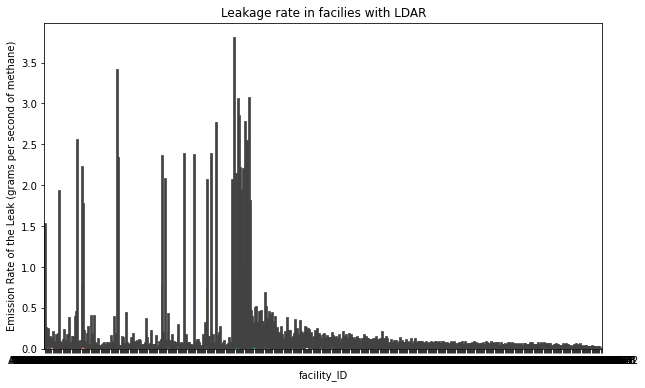

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Leakage rate in facilies with LDAR")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=ogi_l['facility_ID'], y=ogi_l['emission_rate_g_per_sec'])

# Add label for vertical axis
plt.ylabel("Emission Rate of the Leak (grams per second of methane)")

Text(0, 0.5, 'Emission Rate of the Leak (grams per second of methane)')

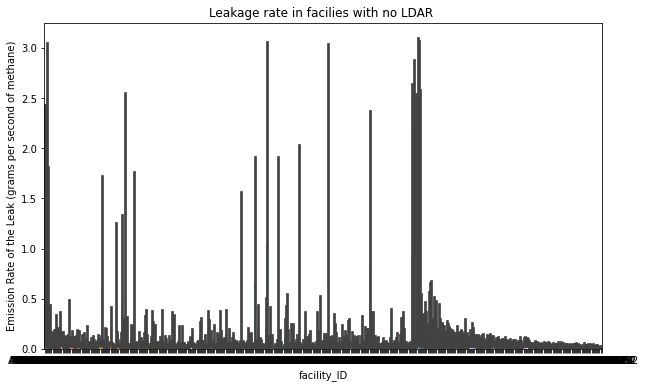

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Leakage rate in facilies with no LDAR ")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=b_l['facility_ID'], y=b_l['emission_rate_g_per_sec'])

# Add label for vertical axis
plt.ylabel("Emission Rate of the Leak (grams per second of methane)")

Facilities with LDAR show a higher rate of mean and maximum methane emissions as comapred to facilities with no LDAR. May be methane emisisons go undetected in case no LDAR

In [ ]:
ACTIVE 

In [34]:
ogi_active = ogi_l[(ogi_l.status == 'active')]

In [35]:
ogi_active

,leak_ID,facility_ID,emission_rate_g_per_sec,lat,lon,status,days_active,date_began,date_tagged,date_repaired
0,ABRAND00762_0000006617,ABRAND00762,0.564586,52.19,-114.64,active,26,2020-05-27 16:00,NaN,NaN
1,ABRAND00182_0000006687,ABRAND00182,0.564586,54.95,-118.88,active,5,2020-06-17 16:00,NaN,NaN
2,ABRAND00075_0000006684,ABRAND00075,0.564586,57.60,-119.57,active,6,2020-06-16 16:00,NaN,NaN
3,ABRAND01025_0000006657,ABRAND01025,0.510965,55.63,-113.44,active,15,2020-06-07 16:00,NaN,NaN
4,ABRAND01066_0000006563,ABRAND01066,0.434572,51.74,-112.68,active,43,2020-05-10 16:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
200,ABRAND01149_0000006681,ABRAND01149,0.003043,54.79,-110.54,active,7,2020-06-15 16:00,NaN,NaN
201,ABRAND00666_0000006676,ABRAND00666,0.003043,52.88,-115.11,active,8,2020-06-14 16:00,NaN,NaN
202,ABRAND00422_0000006546,ABRAND00422,0.003043,53.14,-115.92,active,47,2020-05-06 16:00,NaN,NaN
203,ABRAND00343_0000006605,ABRAND00343,0.002963,53.56,-116.19,active,32,2020-05-21 16:00,NaN,NaN


Text(0, 0.5, 'Emission Rate of the Leak (grams per second of methane)')

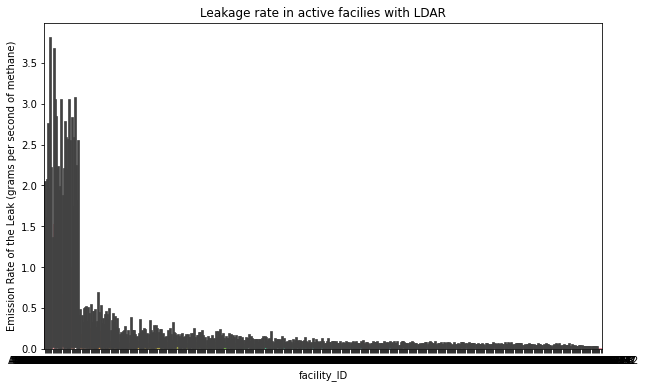

In [57]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Leakage rate in active facilies with LDAR")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=ogi_active['facility_ID'], y=ogi_active['emission_rate_g_per_sec'])

# Add label for vertical axis
plt.ylabel("Emission Rate of the Leak (grams per second of methane)")

In [37]:
ogi_active.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,205.000000,205.000000,205.000000,205.000000
mean,0.056161,53.528537,-115.724585,32.131707
std,0.098430,1.144319,2.126716,18.150709
min,0.000000,50.200000,-119.900000,1.000000
25%,0.006882,52.830000,-116.300000,16.000000
50%,0.017184,53.130000,-115.640000,34.000000
75%,0.052208,54.120000,-114.450000,47.000000
max,0.564586,57.600000,-110.450000,63.000000


In [38]:
baseline_active = b_l[(b_l.status == 'active')]

In [40]:
baseline_active.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,542.000000,542.000000,542.000000,542.000000
mean,0.132466,53.364576,-115.546089,80.455720
std,0.866124,1.342344,2.350445,47.270262
min,0.000000,49.390000,-119.980000,0.000000
25%,0.006484,52.560000,-116.270000,39.250000
50%,0.017035,53.055000,-115.270000,79.000000
75%,0.061437,54.387500,-114.315000,123.000000
max,10.053356,57.690000,-110.320000,163.000000


Text(0, 0.5, 'Emission Rate of the Leak (grams per second of methane)')

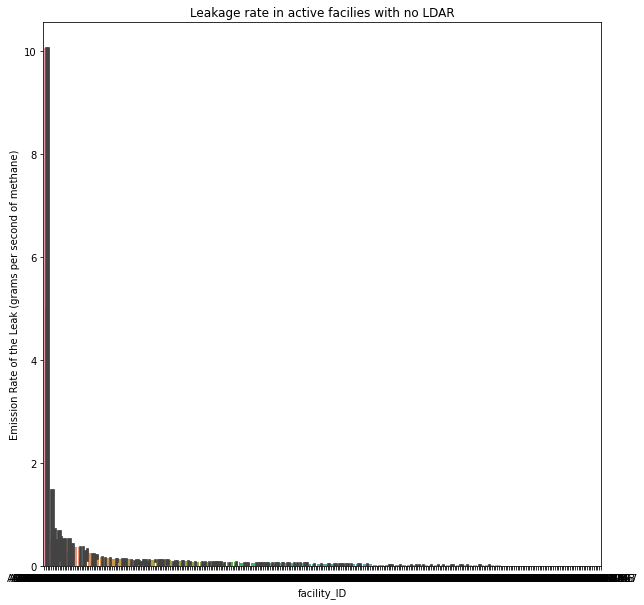

In [181]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("Leakage rate in active facilies with no LDAR")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=baseline_active['facility_ID'], y=baseline_active['emission_rate_g_per_sec'])

# Add label for vertical axis
plt.ylabel("Emission Rate of the Leak (grams per second of methane)")

-In case of active wells where no optical gas imaging (OGI) cameras were used to inspect for leaks, the number of leaks are twice as compared to active wells where optical gas imaging (OGI) cameras were employed.

- Also the mean methane leakage rate 0.132 g/s as comapred to active facilties with no ogi detetcion where the leakage rate is 0.056 g/s. IT is an increase of approximaelt 140 %. 
- The maximum methane emission rate in case of OGI detection in active facilies is 0.56 g/sec as compared to facilities with no OGI detection where it is 10.05 g/sec.

Also, not superisingly the active days of emissions is 542 in case of baseline facilities as comapred to 205 facilities expected in case of facilites that used ogi wells.



In [ ]:
REPAIRED

In [42]:
ogi_repaired = ogi_l[(ogi_l.status == 'repaired')]

In [43]:
ogi_repaired.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.107004,53.510348,-115.543880,62.542096
std,0.713526,1.265911,2.371085,7.242721
min,0.000000,49.390000,-119.950000,16.000000
25%,0.006643,52.780000,-116.390000,64.000000
50%,0.016985,53.140000,-115.380000,64.000000
75%,0.052208,54.450000,-114.270000,65.000000
max,10.053356,57.600000,-110.270000,65.000000


In [46]:
b_repaired = b_l[(b_l.status == 'repaired')]

In [47]:
b_repaired.describe()

,emission_rate_g_per_sec,lat,lon,days_active
count,6228.000000,6228.000000,6228.000000,6228.0
mean,0.096203,53.422815,-115.661792,164.0
std,0.587689,1.235019,2.318301,0.0
min,0.000000,49.060000,-119.990000,164.0
25%,0.006703,52.700000,-116.810000,164.0
50%,0.016587,53.129983,-115.490000,164.0
75%,0.054277,54.390000,-114.390000,164.0
max,10.053356,57.690071,-110.270000,164.0


In [ ]:
Once the wells are repaired there is marginal difference in methane emissions whether we employ ogi or not.

In [114]:
ogi_time = pd.read_csv("OGI_timeseries.csv")

ogi_time

,datetime,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost
0,2015-01-01 0:00,243,3,0,1391.019025,0
1,2015-01-02 23:39,246,3,0,1441.036494,0
2,2015-01-03 23:00,249,4,0,1461.198481,0
3,2015-01-04 23:14,253,5,0,1464.612942,0
4,2015-01-05 23:34,258,6,0,1475.964692,0
...,...,...,...,...,...,...
1995,2020-06-18 16:00,208,5,6483,1881.319787,3175
1996,2020-06-19 16:00,210,4,6488,1888.012955,3625
1997,2020-06-20 16:00,209,3,6490,1020.621342,2950
1998,2020-06-21 16:00,210,2,6494,1027.213125,3400


In [115]:
year = ogi_time .datetime.str.split(expand=True,)
year

,0,1
0,2015-01-01,0:00
1,2015-01-02,23:39
2,2015-01-03,23:00
3,2015-01-04,23:14
4,2015-01-05,23:34
...,...,...
1995,2020-06-18,16:00
1996,2020-06-19,16:00
1997,2020-06-20,16:00
1998,2020-06-21,16:00


In [116]:
ogi_time_up =  pd.concat([year, ogi_time], axis=1)

In [118]:
ogi_time_up = ogi_time_up.drop(['datetime'], axis=1)

In [119]:
ogi_time_up = ogi_time_up.drop([1], axis=1)

In [136]:
ogi_up = ogi_time_up.rename(columns={0: 'Year'})


In [137]:
ogi_up[['Year','Month','Date']] = ogi_up.Year.str.split("-",expand=True,)


In [138]:
ogi_up

,Year,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost,Month,Date
0,2015,243,3,0,1391.019025,0,01,01
1,2015,246,3,0,1441.036494,0,01,02
2,2015,249,4,0,1461.198481,0,01,03
3,2015,253,5,0,1464.612942,0,01,04
4,2015,258,6,0,1475.964692,0,01,05
...,...,...,...,...,...,...,...,...
1995,2020,208,5,6483,1881.319787,3175,06,18
1996,2020,210,4,6488,1888.012955,3625,06,19
1997,2020,209,3,6490,1020.621342,2950,06,20
1998,2020,210,2,6494,1027.213125,3400,06,21


Text(0.5, 1.0, 'COUNT OF ACTIVE LEAKS IN CASE OF INSPECTIONS FROM 2015 TO 2020')

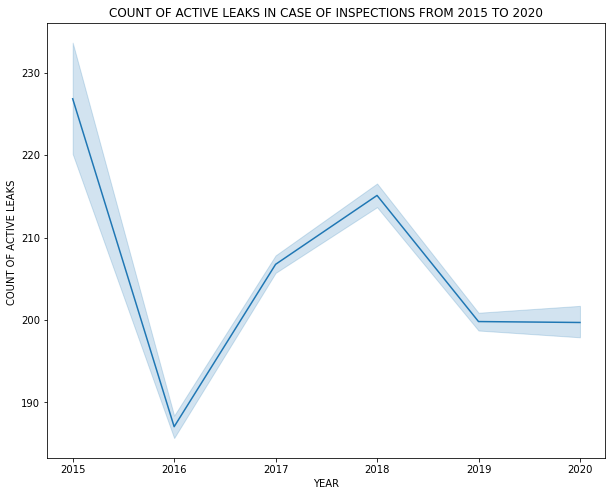

In [183]:
plt.figure(figsize=(10,8))
sns.lineplot(x=ogi_up['Year'], y=ogi_up['active_leaks'])


plt.xlabel('YEAR')
# frequency label
plt.ylabel('COUNT OF ACTIVE LEAKS ')
# plot title
plt.title('COUNT OF ACTIVE LEAKS IN CASE OF INSPECTIONS FROM 2015 TO 2020')

In [ ]:
The number of actiev leaks decreased considerabely in 2016 and then increased slighly in 2018 followed by a secrease in 2019 and 2020

So implementation of OGI cameras is useful in decreasing the leaks

In [149]:
base_time = pd.read_csv("baseline_timeseries.csv")

base_time

,datetime,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost
0,2015-01-01 1:00,238,3,0,1446.427114,0
1,2015-01-02 1:00,241,6,0,1460.437229,0
2,2015-01-03 1:00,247,5,0,1487.581076,0
3,2015-01-04 1:00,252,0,0,1500.383155,0
4,2015-01-05 1:00,252,5,0,1500.383155,0
...,...,...,...,...,...,...
1995,2020-06-18 1:00,543,3,6212,4436.226597,1125
1996,2020-06-19 1:00,541,4,6216,4440.151423,900
1997,2020-06-20 1:00,541,6,6217,4413.031634,225
1998,2020-06-21 1:00,546,4,6223,5339.592914,1350


In [152]:
year = base_time .datetime.str.split(expand=True,)
base_time_up =  pd.concat([year, base_time], axis=1)
base_time_up = base_time_up.drop(['datetime'], axis=1)
base_time_up = base_time_up.drop([1], axis=1)
base_up = base_time_up.rename(columns={0: 'Year'})
base_up[['Year','Month','Date']] = base_up.Year.str.split("-",expand=True,)
base_up

,Year,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost,Month,Date
0,2015,238,3,0,1446.427114,0,01,01
1,2015,241,6,0,1460.437229,0,01,02
2,2015,247,5,0,1487.581076,0,01,03
3,2015,252,0,0,1500.383155,0,01,04
4,2015,252,5,0,1500.383155,0,01,05
...,...,...,...,...,...,...,...,...
1995,2020,543,3,6212,4436.226597,1125,06,18
1996,2020,541,4,6216,4440.151423,900,06,19
1997,2020,541,6,6217,4413.031634,225,06,20
1998,2020,546,4,6223,5339.592914,1350,06,21


In [177]:
base_up.describe()

,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,532.499500,3.266000,2953.359500,4455.958713,700.650000
std,47.218193,1.785452,1880.560692,1295.459656,1258.807223
min,238.000000,0.000000,0.000000,1446.427114,0.000000
25%,522.000000,2.000000,1315.750000,3234.613917,450.000000
50%,535.000000,3.000000,2944.000000,4411.997157,675.000000
75%,550.000000,4.000000,4598.750000,5587.558035,900.000000
max,743.000000,12.000000,6228.000000,6872.111868,53550.000000


In [180]:
ogi_up.describe()

,active_leaks,new_leaks,cum_repaired_leaks,daily_emissions_kg,total_daily_cost
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,206.461500,3.229500,3239.848000,1890.613925,2228.412500
std,32.735949,1.764479,1883.575481,838.323898,1804.682516
min,158.000000,0.000000,0.000000,733.053975,0.000000
25%,192.000000,2.000000,1620.250000,1129.356539,900.000000
50%,203.000000,3.000000,3202.000000,1784.463888,2725.000000
75%,213.000000,4.000000,4893.250000,2524.768652,3400.000000
max,462.000000,11.000000,6497.000000,5255.623297,54675.000000


Text(0.5, 1.0, 'COUNT OF ACTIVE LEAKS IN CASE OF NO INSPECTIONS FROM 2015 TO 2020')

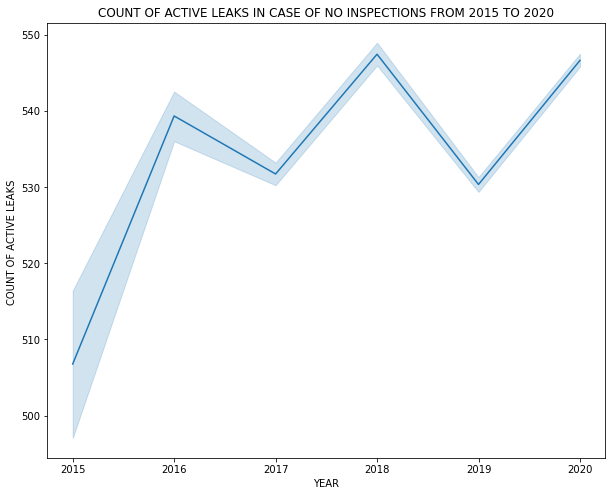

In [176]:
plt.figure(figsize=(10,8))

sns.lineplot(x=base_up['Year'], y=base_up['active_leaks'])

plt.xlabel('YEAR')
# frequency label
plt.ylabel('COUNT OF ACTIVE LEAKS ')
# plot title
plt.title('COUNT OF ACTIVE LEAKS IN CASE OF NO INSPECTIONS FROM 2015 TO 2020')

In [ ]:
The number of methane leaks have been reducing ever since 2015 and they have number of leaks were 510 in 2015 and now they are 550 are in 2020

Text(0.5, 1.0, 'SUMMARY OF METHANE EMISSIONS EMITTED INCASE OF INSPECTIONS FROM 2015 TO 2020')

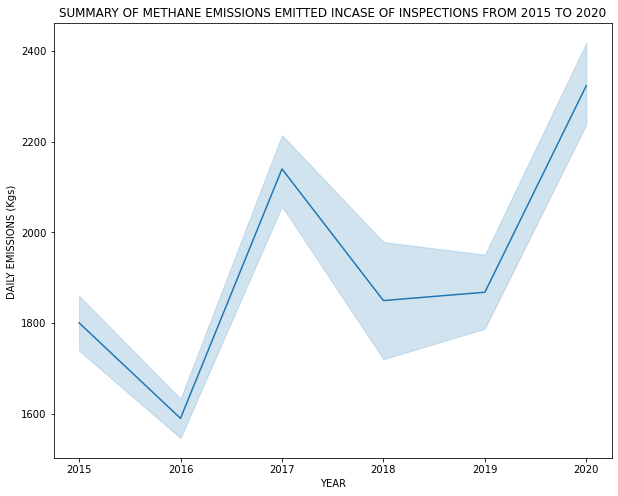

In [171]:
plt.figure(figsize=(10,8))

sns.lineplot(x=ogi_up['Year'], y=ogi_up['daily_emissions_kg'])

plt.xlabel('YEAR')
# frequency label
plt.ylabel('DAILY EMISSIONS (Kgs) ')
# plot title
plt.title('SUMMARY OF METHANE EMISSIONS EMITTED INCASE OF INSPECTIONS FROM 2015 TO 2020')

Text(0.5, 1.0, 'SUMMARY OF METHANE EMISSIONS EMITTED INCASE OF NO INSPECTIONS FROM 2015 TO 2020')

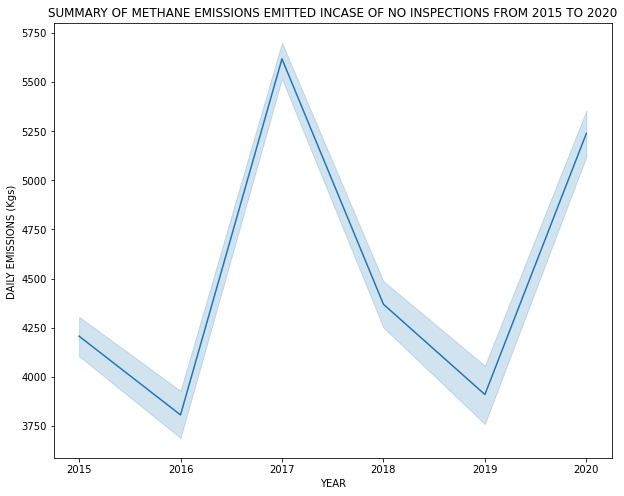

In [170]:
plt.figure(figsize=(10,8))

sns.lineplot(x=base_up['Year'], y=base_up['daily_emissions_kg'])

plt.xlabel('YEAR')
# frequency label
plt.ylabel('DAILY EMISSIONS (Kgs) ')
# plot title
plt.title('SUMMARY OF METHANE EMISSIONS EMITTED INCASE OF NO INSPECTIONS FROM 2015 TO 2020')

In [ ]:
In 2017 and 2020 there considerabely more leaks as comapred to otehr years. The number of leaks in 2017 is probably beacsue the methane regialtions were not that much strict and  in 2020 due to COVID the methane emission regualtions were relaxed.

Nevertheless with OGI cameras the emisisions were considerabely higerline without teh use of OGI cameras as comapred to with the use of OGi cameras




Text(0.5, 1.0, 'SUMMARY OF LEAK COSTS IN CASE OF NO INSPECTIONS FROM 2015 TO 2020')

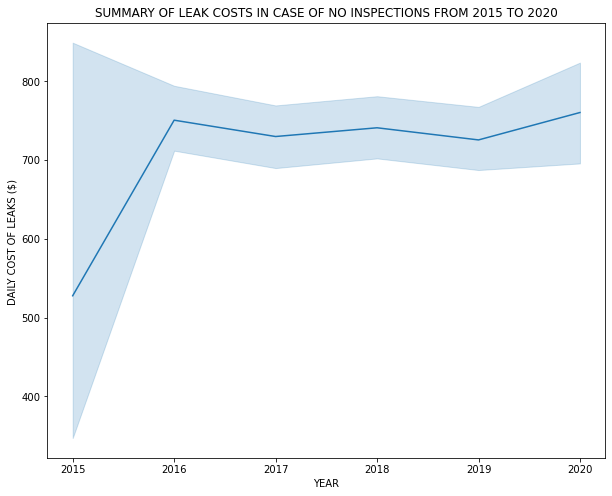

In [168]:
plt.figure(figsize=(10,8))

sns.lineplot(x=base_up['Year'], y=base_up['total_daily_cost'])


plt.xlabel('YEAR')
# frequency label
plt.ylabel('DAILY COST OF LEAKS ($) ')
# plot title
plt.title('SUMMARY OF LEAK COSTS IN CASE OF NO INSPECTIONS FROM 2015 TO 2020')

Text(0.5, 1.0, 'SUMMARY OF LEAK COSTS IN CASE OF INSPECTIONS FROM 2015 TO 2020')

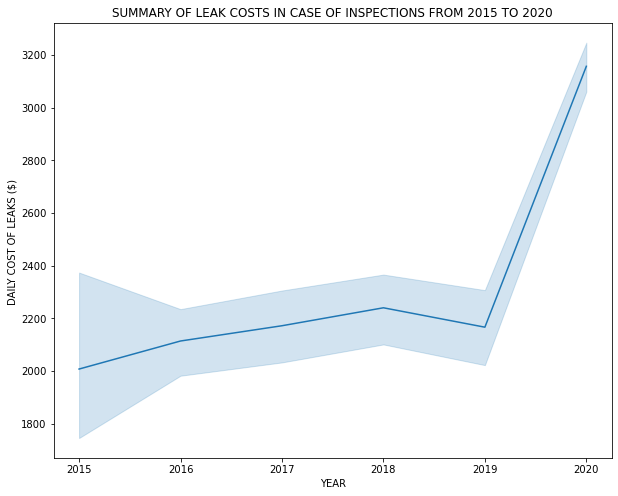

In [178]:
plt.figure(figsize=(10,8))

sns.lineplot(x=ogi_up['Year'], y=ogi_up['total_daily_cost'])


plt.xlabel('YEAR')
# frequency label
plt.ylabel('DAILY COST OF LEAKS ($) ')
# plot title
plt.title('SUMMARY OF LEAK COSTS IN CASE OF INSPECTIONS FROM 2015 TO 2020')

In [ ]:
The cost of inspections was low in 2019 since the number of leaks were also low.

So teh cost of inspection as compared to teh numebr of leaks is